In [1]:
import pandas as pd

In [2]:
instancesHeader = ['GRAPH', 'SOURCE', 'TARGET']

instancesDf = pd.read_csv('gridInstances.inst', delimiter=' ', header=None, names=instancesHeader)
instancesDf['GRAPH'] = instancesDf['GRAPH'].apply(lambda x : "5d_" + x.split('/')[-1])
instancesDf

,GRAPH,SOURCE,TARGET
0,5d_Grid-Problem1.grid,6830,9316
1,5d_Grid-Problem1.grid,8061,9523
2,5d_Grid-Problem1.grid,5317,5903
3,5d_Grid-Problem1.grid,877,768
4,5d_Grid-Problem1.grid,2065,125
...,...,...,...
995,5d_Grid-Problem10.grid,6840,9014
996,5d_Grid-Problem10.grid,7354,8904
997,5d_Grid-Problem10.grid,8471,9620
998,5d_Grid-Problem10.grid,3813,8213


In [3]:
resultsHeader = ['ALGO', 'GRAPH','SOURCE', 'TARGET', 'ITERATIONS', 'EXTRACTIONS', 'TARGET_SOLUTIONS', 'TIME', 'MEMORY', 'MAX_HEAP_SIZE']

mdaDf = pd.read_csv('grids_5d_mda.csv', delimiter=';', header=None, names=resultsHeader)
martinsDf = pd.read_csv('grids_5d_namoa.csv', delimiter=';', header=None, names=resultsHeader)

mergedDf = pd.merge(instancesDf, mdaDf, on=['GRAPH','SOURCE', 'TARGET'], how='left')

In [4]:
mergedDf = pd.merge(mergedDf, martinsDf, on=['GRAPH', 'SOURCE', 'TARGET'], how='left', suffixes=("_mda", "_martins"))
mergedDf = mergedDf.loc[mergedDf['TIME_mda'].notna() | mergedDf['TIME_martins'].notna()]
mergedDf

,GRAPH,SOURCE,TARGET,ALGO_mda,ITERATIONS_mda,EXTRACTIONS_mda,TARGET_SOLUTIONS_mda,TIME_mda,MEMORY_mda,MAX_HEAP_SIZE_mda,ALGO_martins,ITERATIONS_martins,EXTRACTIONS_martins,TARGET_SOLUTIONS_martins,TIME_martins,MEMORY_martins,MAX_HEAP_SIZE_martins
0,5d_Grid-Problem1.grid,6830,9316,T-MDA,645835.0,645835.0,30693.0,35.1930,11.59,378.0,NAMOA_LAZY,677949.0,750611.0,30693.0,42.5902,3.33,49616.0
1,5d_Grid-Problem1.grid,8061,9523,T-MDA,8599057.0,8599057.0,162637.0,3145.7475,110.19,810.0,NAMOA_LAZY,9078682.0,10127006.0,162637.0,4729.6120,30.34,488933.0
2,5d_Grid-Problem1.grid,5317,5903,T-MDA,13863.0,13863.0,1430.0,0.0360,1.23,111.0,NAMOA_LAZY,14613.0,15467.0,1430.0,0.0372,0.11,1409.0
3,5d_Grid-Problem1.grid,877,768,T-MDA,248.0,248.0,28.0,0.0001,0.96,27.0,NAMOA_LAZY,260.0,276.0,28.0,0.0001,0.01,58.0
5,5d_Grid-Problem1.grid,5076,690,T-MDA,8095222.0,8095222.0,166481.0,2701.6970,69.92,942.0,NAMOA_LAZY,8543062.0,9415025.0,166481.0,4182.1507,24.35,384340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,5d_Grid-Problem10.grid,9690,7873,T-MDA,665945.0,665945.0,30319.0,23.7619,6.86,354.0,NAMOA_LAZY,704387.0,773749.0,30319.0,29.8160,3.46,50541.0
995,5d_Grid-Problem10.grid,6840,9014,T-MDA,6170294.0,6170294.0,189917.0,2107.2613,80.41,655.0,NAMOA_LAZY,6531947.0,7408685.0,189917.0,3076.9325,22.68,356355.0
997,5d_Grid-Problem10.grid,8471,9620,T-MDA,9230564.0,9230564.0,138068.0,4198.3831,117.85,961.0,NAMOA_LAZY,9527924.0,10841954.0,138068.0,5216.5643,32.93,555909.0
998,5d_Grid-Problem10.grid,3813,8213,T-MDA,1887333.0,1887333.0,40455.0,191.7835,26.91,750.0,NAMOA_LAZY,1982014.0,2204485.0,40455.0,250.8757,6.48,105063.0


In [5]:
mergedDf.loc[mergedDf['TIME_martins'].isna(), ['TIME_martins']] = 7200
mergedDf['TIME_martins'].max()

7200.0

In [6]:
mergedDf['SPEEDUP'] = mergedDf['TIME_martins']/mergedDf['TIME_mda']
mergedDf['EFF_martins'] = mergedDf['EXTRACTIONS_martins']/mergedDf['TIME_martins']
mergedDf['EFF_mda'] = mergedDf['EXTRACTIONS_mda']/mergedDf['TIME_mda']
worseDf = mergedDf.loc[mergedDf['TIME_martins']<mergedDf['TIME_mda']]
worseDf[['GRAPH', 'SOURCE', 'TARGET', 'TIME_mda', 'TIME_martins', 'SPEEDUP']]

,GRAPH,SOURCE,TARGET,TIME_mda,TIME_martins,SPEEDUP
15,5d_Grid-Problem1.grid,8457,5853,0.4567,0.4499,0.985111
26,5d_Grid-Problem1.grid,2461,559,0.0260,0.0242,0.930769
34,5d_Grid-Problem1.grid,2343,1528,0.0517,0.0404,0.781431
69,5d_Grid-Problem1.grid,5042,4134,0.0210,0.0203,0.966667
89,5d_Grid-Problem1.grid,5902,6707,0.0010,0.0009,0.900000
...,...,...,...,...,...,...
948,5d_Grid-Problem10.grid,1598,1880,0.0033,0.0030,0.909091
957,5d_Grid-Problem10.grid,7842,8028,0.0015,0.0012,0.800000
959,5d_Grid-Problem10.grid,7665,7986,0.0089,0.0082,0.921348
988,5d_Grid-Problem10.grid,1904,1712,0.0003,0.0002,0.666667


In [7]:
from scipy.stats import gmean
extractionLimits = [10**i for i in range (9)]
extractionLimits
print(f"$N$ interval & \
        Instances MDA & avg. $N$ & avg $N_t$ & avg. time MDA & \
        Instances Martins & avg. $N$ & avg. $N_t$ & avg. time Martins & \
        Speedup\\\\")
for i in range(1, len(extractionLimits)):
    print(f"($10^{i-1}$, $10^{i}$] & ")
    slicedDf = mergedDf.loc[(mergedDf['EXTRACTIONS_mda']>extractionLimits[i-1]) & (mergedDf['EXTRACTIONS_mda']<=extractionLimits[i])]
    if len(slicedDf) == 0:
        continue
    martinsDf = slicedDf.loc[slicedDf['EXTRACTIONS_martins'].notna()]
    print(f" {len(slicedDf.loc[slicedDf['EXTRACTIONS_mda'].notna()])} & {gmean(slicedDf['EXTRACTIONS_mda']):.2f} & {gmean(slicedDf['TARGET_SOLUTIONS_mda']):.2f} & {gmean(slicedDf['TIME_mda']):.4f} \
            & {len(martinsDf)} & {gmean(martinsDf['EXTRACTIONS_martins']):.2f} & {gmean(martinsDf['TARGET_SOLUTIONS_martins']):.2f} & {gmean(slicedDf['TIME_martins']):.4f} \
            & {gmean(slicedDf['SPEEDUP']):.2f}\\\\\n")

$N$ interval &         Instances MDA & avg. $N$ & avg $N_t$ & avg. time MDA &         Instances Martins & avg. $N$ & avg. $N_t$ & avg. time Martins &         Speedup\\
($10^0$, $10^1$] & 
 1 & 5.00 & 1.00 & 0.0000             & 1 & 5.00 & 1.00 & 0.0000             & nan\\

($10^1$, $10^2$] & 
 5 & 47.67 & 8.23 & 0.0000             & 5 & 52.14 & 8.23 & 0.0000             & nan\\

($10^2$, $10^3$] & 
 25 & 380.28 & 52.77 & 0.0002             & 25 & 438.63 & 52.77 & 0.0000             & 0.00\\

($10^3$, $10^4$] & 
 35 & 3375.09 & 318.51 & 0.0032             & 35 & 3874.85 & 318.51 & 0.0029             & 0.90\\

($10^4$, $10^5$] & 
 74 & 35667.46 & 2229.61 & 0.1267             & 74 & 41303.93 & 2229.61 & 0.1328             & 1.05\\

($10^5$, $10^6$] & 
 123 & 287439.09 & 11123.86 & 5.2137             & 123 & 335440.31 & 11123.86 & 6.1892             & 1.19\\

($10^6$, $10^7$] & 
 162 & 3534371.39 & 72063.12 & 658.5270             & 156 & 4020895.67 & 68861.57 & 893.1535             & 1.36\

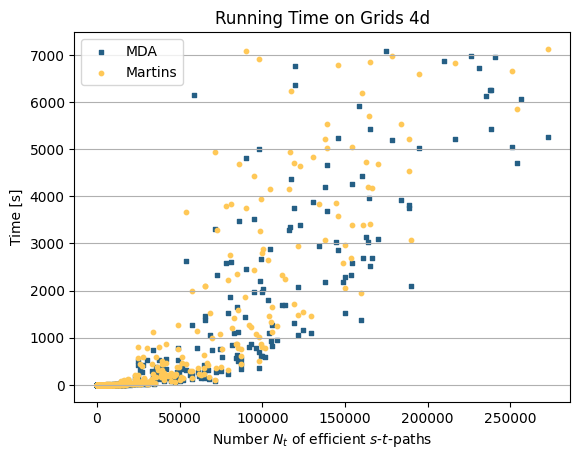

In [8]:
import matplotlib.pyplot as plt

c1 = '#FFC857'
c2 = '#255F85'

mda = list(mergedDf[mergedDf['TIME_mda'].notna()]['TIME_mda'])
xmda = list(mergedDf['TARGET_SOLUTIONS_mda'])
#martins = list(mergedDf[mergedDf['TIME_martins'].notna()]['TIME_martins'])
martins = list(mergedDf[mergedDf['TIME_martins'].notna()]['TIME_martins'])

xmartins = list(mergedDf[mergedDf['TIME_martins'].notna()]['TARGET_SOLUTIONS_martins'])
fig = plt.figure()
fig.patch.set_alpha(0.0)
ax1 = fig.add_subplot(111)

ax1.scatter(xmda, mda, s=10, c=c2, marker="s", label='MDA')
ax1.scatter(xmartins, martins, s=10, c=c1, marker="o", label='Martins')
#ax1.set_yscale('log')
ax1.yaxis.grid(True)
plt.ylabel('Time [s]')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number $N_t$ of efficient $s$-$t$-paths')
plt.legend(loc='upper left')
plt.title(f'Running Time on Grids 4d')
#plt.savefig(f'./plots/grids_3d_martins_mda_linear.svg')
plt.show()


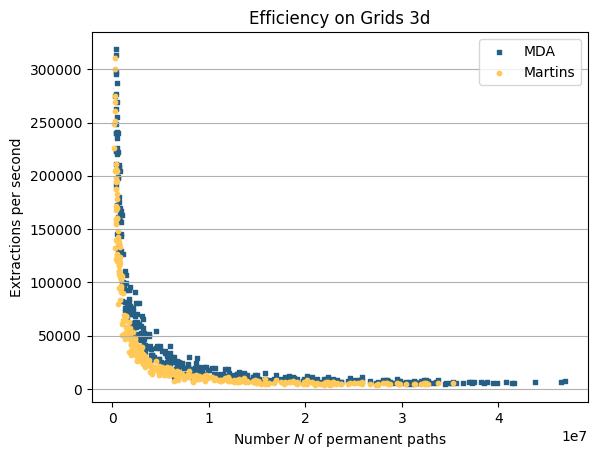

In [11]:
import matplotlib.pyplot as plt

c1 = '#FFC857'
c2 = '#255F85'

mda = list(mergedDf[mergedDf['TIME_mda']>1]['EFF_mda'])
xmda = list(mergedDf[mergedDf['TIME_mda']>1]['EXTRACTIONS_mda'])
martins = list(mergedDf[mergedDf['TIME_martins']>1]['EFF_martins'])
xmartins = list(mergedDf[mergedDf['TIME_martins']>1]['EXTRACTIONS_martins'])
fig = plt.figure()
fig.patch.set_alpha(0.0)
ax1 = fig.add_subplot(111)

ax1.scatter(xmda, mda, s=10, c=c2, marker="s", label='MDA')
ax1.scatter(xmartins, martins, s=10, c=c1, marker="o", label='Martins')
#ax1.set_yscale('log')
ax1.yaxis.grid(True)
plt.ylabel('Extractions per second')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number $N$ of permanent paths')
plt.legend()
plt.title(f'Efficiency on Grids 3d')
plt.savefig(f'./plots/grids_3d_martins_mda_efficiency.svg')
#plt.show()